# Back propagation technique

In [3]:
# Create your first MLP in Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
import numpy

In [4]:
import pandas as pd

In [5]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load forestfires dataset
ff = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Neural Networks\\forestfires (1).csv", delimiter=",")
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
ff.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ff["month"] = label_encoder.fit_transform(ff["month"])
ff["day"] = label_encoder.fit_transform(ff["day"])
ff["size_category"] = label_encoder.fit_transform(ff["size_category"])

In [9]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int32  
 1   day            517 non-null    int32  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
# split into input (X) and output (Y) variables
array = ff.values
X = array[:,0:30]
Y = array[:,30]

In [11]:
# create model
model = Sequential()
model.add(layers.Dense(80, input_dim=30,  activation='relu'))
model.add(layers.Dense(30,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 6s 109ms/step - loss: 7.3027 - acc: 0.6316 - val_loss: 1.0107 - val_acc: 0.8129
Epoch 2/250
35/35 [==============================] - 0s 10ms/step - loss: 1.2501 - acc: 0.8119 - val_loss: 0.6291 - val_acc: 0.8187
Epoch 3/250
35/35 [==============================] - 0s 10ms/step - loss: 0.2253 - acc: 0.9241 - val_loss: 0.3975 - val_acc: 0.8421
Epoch 4/250
35/35 [==============================] - 0s 10ms/step - loss: 0.2385 - acc: 0.9189 - val_loss: 0.2458 - val_acc: 0.9240
Epoch 5/250
35/35 [==============================] - 0s 9ms/step - loss: 0.2416 - acc: 0.9058 - val_loss: 0.3643 - val_acc: 0.8304
Epoch 6/250
35/35 [==============================] - 0s 10ms/step - loss: 0.5276 - acc: 0.8646 - val_loss: 1.0872 - val_acc: 0.8129
Epoch 7/250
35/35 [==============================] - 0s 10ms/step - loss: 0.2076 - acc: 0.9170 - val_loss: 1.3354 - val_acc: 0.5088
Epoch 8/250
35/35 [==============================] - 0s 10ms/step - loss: 0.

Epoch 63/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0075 - acc: 0.9965 - val_loss: 0.1086 - val_acc: 0.9708
Epoch 64/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0495 - acc: 0.9874 - val_loss: 0.0676 - val_acc: 0.9649
Epoch 65/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0407 - acc: 0.9802 - val_loss: 0.0950 - val_acc: 0.9591
Epoch 66/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0179 - acc: 0.9998 - val_loss: 0.1583 - val_acc: 0.9532
Epoch 67/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0582 - acc: 0.9803 - val_loss: 0.0831 - val_acc: 0.9591
Epoch 68/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0220 - acc: 0.9914 - val_loss: 0.0791 - val_acc: 0.9591
Epoch 69/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0728 - acc: 0.9799 - val_loss: 0.1083 - val_acc: 0.9532
Epoch 70/250
35/35 [==============================] - 0s 10ms/step - lo

35/35 [==============================] - 0s 9ms/step - loss: 0.0551 - acc: 0.9858 - val_loss: 0.2879 - val_acc: 0.9474
Epoch 186/250
35/35 [==============================] - 0s 10ms/step - loss: 0.1300 - acc: 0.9585 - val_loss: 0.5028 - val_acc: 0.9357
Epoch 187/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0958 - acc: 0.9792 - val_loss: 0.2301 - val_acc: 0.9532
Epoch 188/250
35/35 [==============================] - 0s 9ms/step - loss: 0.1689 - acc: 0.9729 - val_loss: 0.1472 - val_acc: 0.9649
Epoch 189/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0317 - acc: 0.9855 - val_loss: 0.1314 - val_acc: 0.9649
Epoch 190/250
35/35 [==============================] - 0s 10ms/step - loss: 0.0270 - acc: 0.9909 - val_loss: 0.1405 - val_acc: 0.9649
Epoch 191/250
35/35 [==============================] - 0s 9ms/step - loss: 0.0244 - acc: 0.9908 - val_loss: 0.2180 - val_acc: 0.9532
Epoch 192/250
35/35 [==============================] - 0s 9ms/step - loss: 0.009

In [14]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 0.0709 - acc: 0.9865
acc: 98.65%


In [15]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

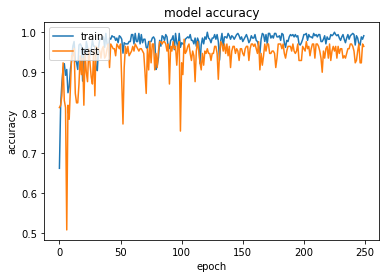

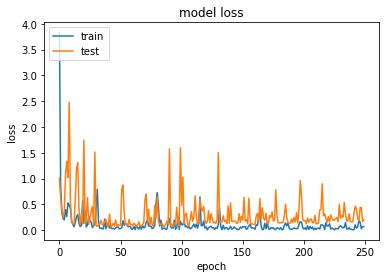

In [16]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hypertuning

In [17]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [18]:
ff = pd.read_csv("E:\\ASSIGNMENT FROM EXCELR\\Neural Networks\\forestfires (1).csv", delimiter=",")
ff.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [19]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
ff["month"] = label_encoder.fit_transform(ff["month"])
ff["day"] = label_encoder.fit_transform(ff["day"])
ff["size_category"] = label_encoder.fit_transform(ff["size_category"])

In [20]:
# split into input (X) and output (Y) variables
array = ff.values
X = array[:,0:30]
y = array[:,30]

In [21]:
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [22]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-4.874674e-17,5.110891e-17,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959e+00,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-1.089076e+00,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,5.533922e-02,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,1.199754e+00,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.199754e+00,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


# Tuning of Hyperparameters :- Batch Size and Epochs

In [23]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [24]:
# create model\n",
def create_model():
    model = Sequential()
    model.add(Dense(18, input_dim=30, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [25]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=0.923, total=   4.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.827, total=   4.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.0s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.864, total=   4.4s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.845, total=   4.7s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.845, total=   4.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   22.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.990, total=   9.0s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.875, total=   9.3s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   40.7s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.883, total=   8.8s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   49.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.883, total=   8.9s
[CV] batch_size=10, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   58.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=50, score=0.893, total=   8.8s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.990, total=  15.1s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.846, total=  14.4s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.845, total=  14.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.913, total=  14.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.854, total=  15.2s
[CV] batch_size=20, epochs=10 ........................................
[CV] ............ batch_size=20, epochs=10, score=0.990, total=   3.7s
[CV] batch_size=20, epochs=10 ........................................
[CV] .

[CV] ............ batch_size=40, epochs=50, score=0.864, total=   4.8s
[CV] batch_size=40, epochs=50 ........................................
[CV] ............ batch_size=40, epochs=50, score=0.854, total=   5.2s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.990, total=   6.4s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.827, total=   6.5s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.854, total=   6.4s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.864, total=   6.9s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.854, total=   6.5s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  5.2min finished


In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9051157593727112, using {'batch_size': 10, 'epochs': 50}
0.8606796264648438,0.03333981873139204 with: {'batch_size': 10, 'epochs': 10}
0.9051157593727112,0.04302216982114636 with: {'batch_size': 10, 'epochs': 50}
0.889637804031372,0.056277703906748563 with: {'batch_size': 10, 'epochs': 100}
0.8295182943344116,0.0866882311622322 with: {'batch_size': 20, 'epochs': 10}
0.8838125467300415,0.050919535411971924 with: {'batch_size': 20, 'epochs': 50}
0.8915982127189637,0.04828960966276529 with: {'batch_size': 20, 'epochs': 100}
0.7445108294487,0.06707217353822484 with: {'batch_size': 40, 'epochs': 10}
0.8837938785552979,0.05341789155487781 with: {'batch_size': 40, 'epochs': 50}
0.8780246496200561,0.057532325910941755 with: {'batch_size': 40, 'epochs': 100}


# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [27]:
from keras.layers import Dropout
# Defining the model
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(30,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 30,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Define the grid search parameters
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
# Make a dictionary of the grid search parameters
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0.0, learning_rate=0.001, score=1.000, total=   4.2s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.750, total=   3.7s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.524, total=   3.7s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.6s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.680, total=   3.8s
[CV] dropout_rate=0.0, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.001, score=0.709, total=   4.3s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.7s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.971, total=   3.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   23.5s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.817, total=   3.9s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.4s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.718, total=   6.6s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   34.0s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.816, total=   5.8s
[CV] dropout_rate=0.0, learning_rate=0.01 ............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   39.8s remaining:    0.0s


[CV]  dropout_rate=0.0, learning_rate=0.01, score=0.835, total=   4.6s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=1.000, total=   4.9s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.750, total=   5.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.524, total=   4.5s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.728, total=   4.7s
[CV] dropout_rate=0.0, learning_rate=0.1 .............................
[CV] . dropout_rate=0.0, learning_rate=0.1, score=0.796, total=   5.2s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=1.000, total=   4.3s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV] 

[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.680, total=   4.3s
[CV] dropout_rate=0.1, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.1, learning_rate=0.001, score=0.699, total=   3.9s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.913, total=   3.8s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.750, total=   4.3s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.670, total=   3.8s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.786, total=   3.8s
[CV] dropout_rate=0.1, learning_rate=0.01 ............................
[CV]  dropout_rate=0.1, learning_rate=0.01, score=0.806, total=   3.8s
[CV] dropout_rate=0.1, learning_rate=0.1 .............................
[CV]

[CV] . dropout_rate=0.1, learning_rate=0.1, score=0.689, total=   3.9s
[CV] dropout_rate=0.1, learning_rate=0.1 .............................
[CV] . dropout_rate=0.1, learning_rate=0.1, score=0.699, total=   4.3s
[CV] dropout_rate=0.2, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.2, learning_rate=0.001, score=1.000, total=   3.7s
[CV] dropout_rate=0.2, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.2, learning_rate=0.001, score=0.740, total=   3.8s
[CV] dropout_rate=0.2, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.2, learning_rate=0.001, score=0.524, total=   4.3s
[CV] dropout_rate=0.2, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.2, learning_rate=0.001, score=0.680, total=   3.8s
[CV] dropout_rate=0.2, learning_rate=0.001 ...........................
[CV]  dropout_rate=0.2, learning_rate=0.001, score=0.709, total=   3.8s
[CV] dropout_rate=0.2, learning_rate=0.01 ............................
[

[CV]  dropout_rate=0.2, learning_rate=0.01, score=0.680, total=   3.8s
[CV] dropout_rate=0.2, learning_rate=0.01 ............................
[CV]  dropout_rate=0.2, learning_rate=0.01, score=0.786, total=   4.4s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV] . dropout_rate=0.2, learning_rate=0.1, score=1.000, total=   3.9s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV] . dropout_rate=0.2, learning_rate=0.1, score=0.750, total=   3.9s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV] . dropout_rate=0.2, learning_rate=0.1, score=0.524, total=   4.3s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV] . dropout_rate=0.2, learning_rate=0.1, score=0.680, total=   4.5s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV] . dropout_rate=0.2, learning_rate=0.1, score=0.699, total=   3.9s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.2min finished


In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.831478726863861, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7325242638587952,0.15400213076804797 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.831478726863861,0.08093517461853411 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7597087383270263,0.15204330059496132 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7851194977760315,0.07925946297163355 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7383681893348694,0.14361412252389563 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7306011915206909,0.15383183968361996 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7810866236686707,0.1071382964564792 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


# "Tuning of Hyperparameters:- Activation Function and Kernel Initializer"

In [29]:
# Defining the model
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(30,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=softmax, init=uniform, score=1.000, total=   4.4s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.250, total=   4.0s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.476, total=   3.9s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.3s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.680, total=   4.1s
[CV] activation_function=softmax, init=uniform .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   16.4s remaining:    0.0s


[CV]  activation_function=softmax, init=uniform, score=0.709, total=   4.6s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.0s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=1.000, total=   3.9s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   24.9s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.750, total=   4.0s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   28.9s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.524, total=   7.4s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   36.3s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.320, total=   4.1s
[CV] activation_function=softmax, init=normal ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   40.4s remaining:    0.0s


[CV]  activation_function=softmax, init=normal, score=0.699, total=   4.0s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=1.000, total=   4.5s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.750, total=   3.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.524, total=   3.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.680, total=   3.9s
[CV] activation_function=softmax, init=zero ..........................
[CV]  activation_function=softmax, init=zero, score=0.699, total=   4.4s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=1.000, total=   3.9s
[CV] activation_function=relu, init=uniform .................

[CV]  activation_function=relu, init=uniform, score=0.680, total=   3.8s
[CV] activation_function=relu, init=uniform ..........................
[CV]  activation_function=relu, init=uniform, score=0.699, total=   3.8s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=1.000, total=   3.8s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.750, total=   4.3s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.534, total=   3.8s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.680, total=   3.8s
[CV] activation_function=relu, init=normal ...........................
[CV]  activation_function=relu, init=normal, score=0.699, total=   3.9s
[CV] activation_function=relu, init=zero ...........................

[CV] . activation_function=relu, init=zero, score=0.680, total=   4.4s
[CV] activation_function=relu, init=zero .............................
[CV] . activation_function=relu, init=zero, score=0.699, total=   3.8s
[CV] activation_function=tanh, init=uniform ..........................
[CV]  activation_function=tanh, init=uniform, score=0.933, total=   3.8s
[CV] activation_function=tanh, init=uniform ..........................
[CV]  activation_function=tanh, init=uniform, score=0.750, total=   4.2s
[CV] activation_function=tanh, init=uniform ..........................
[CV]  activation_function=tanh, init=uniform, score=0.660, total=   3.8s
[CV] activation_function=tanh, init=uniform ..........................
[CV]  activation_function=tanh, init=uniform, score=0.699, total=   3.8s
[CV] activation_function=tanh, init=uniform ..........................
[CV]  activation_function=tanh, init=uniform, score=0.718, total=   3.8s
[CV] activation_function=tanh, init=normal ........................

[CV]  activation_function=tanh, init=normal, score=0.699, total=   3.9s
[CV] activation_function=tanh, init=normal ...........................
[CV]  activation_function=tanh, init=normal, score=0.709, total=   4.3s
[CV] activation_function=tanh, init=zero .............................
[CV] . activation_function=tanh, init=zero, score=1.000, total=   3.8s
[CV] activation_function=tanh, init=zero .............................
[CV] . activation_function=tanh, init=zero, score=0.750, total=   3.8s
[CV] activation_function=tanh, init=zero .............................
[CV] . activation_function=tanh, init=zero, score=0.524, total=   4.2s
[CV] activation_function=tanh, init=zero .............................
[CV] . activation_function=tanh, init=zero, score=0.680, total=   3.8s
[CV] activation_function=tanh, init=zero .............................
[CV] . activation_function=tanh, init=zero, score=0.699, total=   3.8s
[CV] activation_function=linear, init=uniform ........................
[CV]

[CV]  activation_function=linear, init=uniform, score=0.699, total=   3.7s
[CV] activation_function=linear, init=uniform ........................
[CV]  activation_function=linear, init=uniform, score=0.680, total=   4.1s
[CV] activation_function=linear, init=normal .........................
[CV]  activation_function=linear, init=normal, score=0.971, total=   3.7s
[CV] activation_function=linear, init=normal .........................
[CV]  activation_function=linear, init=normal, score=0.750, total=   3.7s
[CV] activation_function=linear, init=normal .........................
[CV]  activation_function=linear, init=normal, score=0.641, total=   3.7s
[CV] activation_function=linear, init=normal .........................
[CV]  activation_function=linear, init=normal, score=0.699, total=   4.2s
[CV] activation_function=linear, init=normal .........................
[CV]  activation_function=linear, init=normal, score=0.699, total=   3.7s
[CV] activation_function=linear, init=zero ...........

[CV]  activation_function=linear, init=zero, score=0.680, total=   3.7s
[CV] activation_function=linear, init=zero ...........................
[CV]  activation_function=linear, init=zero, score=0.699, total=   3.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.0min finished


In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.753976845741272, using {'activation_function': 'tanh', 'init': 'normal'}
0.6228155255317688,0.25040075130184614 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6587378680706024,0.22758449693740784 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7325242757797241,0.15178268966445949 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7520724415779114,0.09488280217161148 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.753976845741272,0.10689019571329157 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7462098598480225,0.10784878039945721 with: {'activation_

# "Tuning of Hyperparameter :-Number of Neurons in activation layer"

In [31]:
# Defining the model
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Define the grid search parameters
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ neuron1=4, neuron2=2, score=1.000, total=   3.7s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.750, total=   3.7s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.544, total=   3.9s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.2s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.680, total=   4.2s
[CV] neuron1=4, neuron2=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   15.4s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=2, score=0.718, total=   3.7s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=1.000, total=   3.7s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.8s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.750, total=   4.3s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   27.1s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.592, total=   3.7s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   30.9s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.680, total=   3.7s
[CV] neuron1=4, neuron2=4 ............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.6s remaining:    0.0s


[CV] ................ neuron1=4, neuron2=4, score=0.709, total=   4.3s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.981, total=   3.8s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.750, total=   3.7s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.621, total=   3.7s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.680, total=   4.2s
[CV] neuron1=4, neuron2=8 ............................................
[CV] ................ neuron1=4, neuron2=8, score=0.718, total=   3.7s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.942, total=   3.7s
[CV] neuron1=8, neuron2=2 ............................................
[CV] .

[CV] ................ neuron1=8, neuron2=2, score=0.680, total=   3.7s
[CV] neuron1=8, neuron2=2 ............................................
[CV] ................ neuron1=8, neuron2=2, score=0.699, total=   3.7s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.923, total=   4.1s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.750, total=   3.7s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.612, total=   3.7s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.680, total=   4.2s
[CV] neuron1=8, neuron2=4 ............................................
[CV] ................ neuron1=8, neuron2=4, score=0.699, total=   3.7s
[CV] neuron1=8, neuron2=8 ............................................
[CV] .

[CV] ................ neuron1=8, neuron2=8, score=0.699, total=   3.7s
[CV] neuron1=8, neuron2=8 ............................................
[CV] ................ neuron1=8, neuron2=8, score=0.709, total=   3.7s
[CV] neuron1=16, neuron2=2 ...........................................
[CV] ............... neuron1=16, neuron2=2, score=0.933, total=   3.7s
[CV] neuron1=16, neuron2=2 ...........................................
[CV] ............... neuron1=16, neuron2=2, score=0.750, total=   4.3s
[CV] neuron1=16, neuron2=2 ...........................................
[CV] ............... neuron1=16, neuron2=2, score=0.612, total=   3.9s
[CV] neuron1=16, neuron2=2 ...........................................
[CV] ............... neuron1=16, neuron2=2, score=0.699, total=   3.9s
[CV] neuron1=16, neuron2=2 ...........................................
[CV] ............... neuron1=16, neuron2=2, score=0.680, total=   4.2s
[CV] neuron1=16, neuron2=4 ...........................................
[CV] .

[CV] ............... neuron1=16, neuron2=4, score=0.689, total=   3.7s
[CV] neuron1=16, neuron2=4 ...........................................
[CV] ............... neuron1=16, neuron2=4, score=0.699, total=   3.7s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=0.942, total=   3.7s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=0.750, total=   4.2s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=0.650, total=   3.7s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=0.689, total=   3.7s
[CV] neuron1=16, neuron2=8 ...........................................
[CV] ............... neuron1=16, neuron2=8, score=0.699, total=   3.7s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished


In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.755862581729889, using {'neuron1': 8, 'neuron2': 8}
0.7383495092391967,0.14855003921517848 with: {'neuron1': 4, 'neuron2': 2}
0.7461164951324463,0.13709274680470043 with: {'neuron1': 4, 'neuron2': 4}
0.7500373363494873,0.12308778358570346 with: {'neuron1': 4, 'neuron2': 8}
0.7345780491828918,0.11425135907286664 with: {'neuron1': 8, 'neuron2': 2}
0.7326736330986023,0.10502166691756303 with: {'neuron1': 8, 'neuron2': 4}
0.755862581729889,0.11773946289178316 with: {'neuron1': 8, 'neuron2': 8}
0.7345967054367065,0.10852032974853627 with: {'neuron1': 16, 'neuron2': 2}
0.7462098598480225,0.10854572801940951 with: {'neuron1': 16, 'neuron2': 4}
0.7462285399436951,0.10304787615697741 with: {'neuron1': 16, 'neuron2': 8}


# Training model with optimum values of Hyperparameters

In [33]:
from sklearn.metrics import classification_report, accuracy_score
# Defining the model
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 30,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)
# Fitting the model
model.fit(X_standardized,y)
# Predicting using trained model
y_predict = model.predict(X_standardized)
# Printing the metrics
print(accuracy_score(y,y_predict))

E:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7775628626692457


In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 30,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]
# Make a dictionary of the grid search parameters
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))